Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
img:  (212, 320, 3)
<class 'matplotlib.axes._axes.Axes'>


<function matplotlib.pyplot.show(close=None, block=None)>

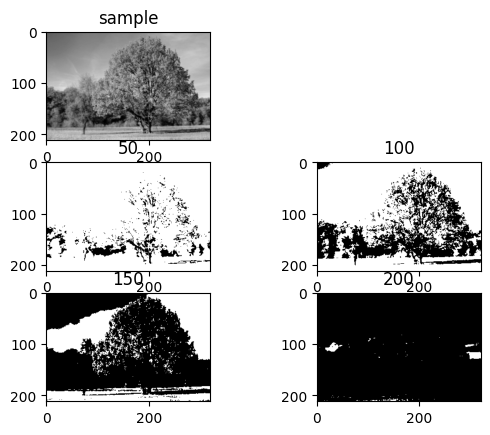

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


from pathlib import Path # ファイルシステム
from google.colab import drive # Google drive
drive.mount('/content/drive')
p = Path('/content/drive/My Drive/iicex/')  # 画像ファイルのフォルダ
#list( p.iterdir() )  # フォルダの内容をリストにする


from skimage import io # 入出力ライブラリの読み込み
img = io.imread('/content/drive/My Drive/iicex/tree.png')  # 画像ファイルの読み込み
print("img: ", img.shape)


fig = plt.figure()


imgs = [[] for i in range(5)]
imgs[0] = np.array([[0.2989 * img[i, j, 0] + 0.5870 * img[i, j, 1] + 0.1140 * img[i, j, 2] for j in range(320)] for i in range(212)], dtype='uint8')
for k in range(4):
  imgs[k+1] = np.array( [ [255 if imgs[0][i, j] > 50 * (1+k) else 0 for j in range(320)] for i in range(212)], dtype = 'uint8')



axes = [[] for i in range(5)]


axes[0] =  fig.add_subplot(3, 2, 1)
print(type(axes[0]))
axes[0].set_title('sample')


for k in range(4):
  axes[k+1] = fig.add_subplot(3, 2, k+3)
  axes[k+1].set_title(50*(k+1))



for k in range(5):
  axes[k].imshow(imgs[k], cmap='gray', vmin=0, vmax=255)


plt.show